### Practice № 4


In [1]:
import requests


url = 'https://www.dataaccess.com/webservicesserver/NumberConversion.wso'

inputvalue = """1000"""

payload ="""<?xml version="1.0" encoding="utf-8"?>
            <soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
            <soap:Body>
                <NumberToWords xmlns="http://www.dataaccess.com/webservicesserver/">
                <ubiNum>"""+ inputvalue +"""</ubiNum>
                </NumberToWords>
            </soap:Body>
            </soap:Envelope>"""

headers = {
    'Content-Type': 'text/xml; charset=utf-8'
}

response = requests.request("POST", url, headers=headers, data=payload)


print('Result: ', response.text)
# print(response)

Result:  <?xml version="1.0" encoding="utf-8"?>
<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
  <soap:Body>
    <m:NumberToWordsResponse xmlns:m="http://www.dataaccess.com/webservicesserver/">
      <m:NumberToWordsResult>one thousand</m:NumberToWordsResult>
    </m:NumberToWordsResponse>
  </soap:Body>
</soap:Envelope>


In [ ]:
!pip install zeep

Full country info
Name:  Russian Federation
Language:  Russian
Currency:  RUB
Flag: 


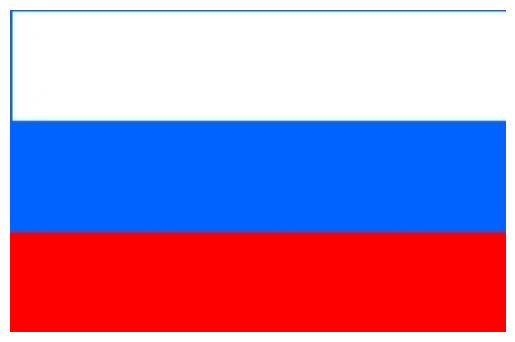

In [21]:
# 2
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

import zeep 

wsdl_url = "http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso?WSDL" 

method_url = "http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso?op=FullCountryInfo"

service_url = "http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso"

header = zeep.xsd.Element(
    "Header",
    zeep.xsd.ComplexType(
        [
            zeep.xsd.Element(
                 "{http://www.w3.org/2005/08/addressing}Action", zeep.xsd.String()
            ),
            zeep.xsd.Element(
                 "{http://www.w3.org/2005/08/addressing}To", zeep.xsd.String()
            ),
        ]
    ),
)

header_value = header(Action=method_url, To=service_url)

client = zeep.Client(wsdl=wsdl_url)

country_code = "RU"

result = client.service.FullCountryInfo(sCountryISOCode=country_code, _soapheaders=[header_value])

print('Full country info')
print("Name: ", result.sName)
print("Language: ",result.Languages.tLanguage[0].sName)
print("Currency: ", result.sCurrencyISOCode)
print("Flag: ")

response = requests.get(result.sCountryFlag)
img = Image.open(BytesIO(response.content))

plt.axis("off")
plt.imshow(img)
